In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv('hyundai.csv') #, index_col=0)
df1['이용일자'] = df1['이용일자'].apply(pd.to_datetime)
#pd.to_datetime(df1['이용일자'].dt.strftime('%Y-%m-%d'))

df1['이용금액'] = df1['이용금액'].map(lambda x: x.replace(',', '')).astype(int)

df1.infer_objects()
print(df1.dtypes)

df1.head()

이용일자    datetime64[ns]
가맹점명            object
사업번호             int64
분야              object
이용금액             int32
dtype: object


,이용일자,가맹점명,사업번호,분야,이용금액
0,2019-10-07,소오밥,2833600389,요식,6500
1,2019-10-07,이화여자대학교생활,1108208789,쇼핑/유통,2700
2,2019-10-06,봉구스밥버거이대점,5171000375,요식,11000
3,2019-10-06,베브릿지이화여대점,2440401228,요식,4000
4,2019-10-04,씨유이화SK텔레콤관점,5363100352,쇼핑/유통,3900


In [3]:
#df1 = df1.reset_index()

In [4]:
df2 = pd.read_csv('woori.csv')

df2['이용일자'] = df2['이용일자'].apply(lambda x: '2019.' + x).apply(pd.to_datetime)
#pd.to_datetime(df2['이용일자'], infer_datetime_format=True)

df2['이용금액'] = df2['이용금액'].map(lambda x: x.replace(',', '')).astype(int)

df2.head()

,이용일자,가맹점명,사업번호,분야,이용금액
0,2019-10-11 13:33:57,티머니택시（개인,1048183559,기타,6900
1,2019-10-08 19:14:33,（주）인터파크＿,2148798889,문화/오락/레져,30000
2,2019-10-08 19:10:14,（주）인터파크＿,2148798889,문화/오락/레져,3000
3,2019-10-08 17:41:47,케익갤러리,2041944392,요식,10500
4,2019-10-05 10:55:57,커피브레이크,4950901215,요식,4200


In [5]:
df3 = pd.read_csv('nh.csv')
df3['이용일자'] = df3['이용일자'].apply(pd.to_datetime)
df3.head()

,이용일자,가맹점명,이용금액
0,2019-10-11 17:45:33,세븐일레븐용산전자상가점,"1,900원"
1,2019-10-10 15:04:02,이화여자대학교생활협동조합,"3,200원"
2,2019-10-09 22:03:42,GS25신촌현대점,"1,200원"
3,2019-10-09 12:11:04,봉구스밥버거이대점,"2,700원"
4,2019-10-06 21:53:04,GS25이화여대점,"1,000원"


In [6]:
small=df1[df1['이용금액'] < 5000].index.tolist()
weekend=df1[df1['이용일자'].dt.dayofweek > 5].index.tolist()

print('소액(<5000)으로 소비한 횟수:\t%d회, %.1f%%' %(len(small), len(small)/len(df1)*100))
print('주말에 소비한 횟수:\t\t%d회, %.1f%%' %(len(weekend), len(weekend)/len(df1)*100))

소액(<5000)으로 소비한 횟수:	291회, 51.6%
주말에 소비한 횟수:		47회, 8.3%


In [7]:
category = list(set(df1['분야']))
category_num, category_num2 = [len(df1[df1['분야'] == i]) for i in category], [len(df2[df2['분야'] == i]) for i in category]
for i in range(len(category)):
    print(category[i], category_num[i])

쇼핑/유통 193
의료(병/의원) 4
문화/오락/레져 25
요식 289
기타 53


In [8]:
%matplotlib inline

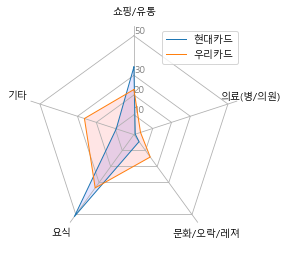

In [9]:
import matplotlib.pyplot as plt
from math import pi

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)


N = len(category)

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

ax = plt.subplot(111, polar=True)

ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

plt.xticks(angles[:-1], set(df1['분야']))

ax.set_rlabel_position(0)
plt.yticks([10,20,30,50], ["10","20","30","50"], color="grey", size=10)
plt.ylim(0,55)

values=[x/len(df1)*100 for x in category_num]
values += values[:1]

ax.plot(angles, values, linewidth=1, linestyle='solid', label="현대카드")
ax.fill(angles, values, 'b', alpha=0.1)

values2=[x/len(df2)*100 for x in category_num2]
values2 += values2[:1]

ax.plot(angles, values2, linewidth=1, linestyle='solid', label="우리카드")
ax.fill(angles, values2, 'r', alpha=0.1)


plt.legend(loc='best')#, bbox_to_anchor=(0.1, 0.1))

gridlines = ax.yaxis.get_gridlines()
for gl in gridlines:
    gl.get_path()._interpolation_steps = 5
    
#ax.spines
ax.spines['polar'].set_visible(False)

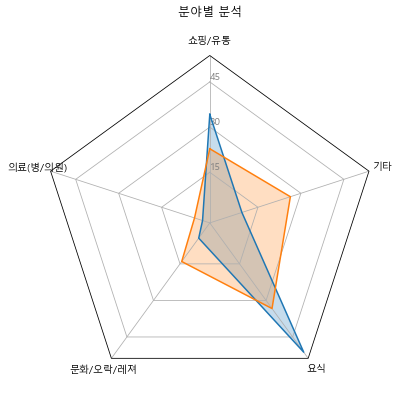

In [10]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)


def radar_factory(num_vars, frame='circle'):
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarAxes(PolarAxes):

        name = 'radar'

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

        def draw(self, renderer):
            if frame == 'polygon':
                gridlines = self.yaxis.get_gridlines()
                for gl in gridlines:
                    gl.get_path()._interpolation_steps = num_vars
            super().draw(renderer)


        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                spine = Spine(axes=self, spine_type='circle', path=Path.unit_regular_polygon(num_vars))
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5) + self.transAxes)


                return {'polar': spine}
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta

data = [category, ('분야별 분석', [values[:-1], values2[:-1]])]

N = len(data[0])
theta = radar_factory(N, frame='polygon')

spoke_labels = data.pop(0)
title, case_data = data[0]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(projection='radar'))
fig.subplots_adjust(top=0.85, bottom=0.05)

ax.set_rgrids([15,30,45], color="grey")
ax.set_rlabel_position(0)
#lt.yticks([10,20,30,50], ["10","20","30","50"], color="grey", size=10)
ax.set_title(title,  position=(0.5, 1.1), ha='center')

for d in case_data:
    line = ax.plot(theta, d)
    ax.fill(theta, d,  alpha=0.25)
ax.set_varlabels(spoke_labels)

plt.show()